# Underwater Image Classification

### Import packages


In [1]:
import numpy as np
import os
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2 
import tensorflow as tf
from tqdm import tqdm

In [2]:
class_names = ['pipe', 'env']
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

### Loadnig the Data

In [3]:
# imports
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from sklearn.model_selection import train_test_split

In [4]:
# create pipe_dataset directories
dataset_home = 'pipe_dataset/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    #create label subdirectories
    labeldirs = ['pipes/']
    for labeldir in labeldirs:
        newdir = dataset_home + subdir + labeldir
        makedirs(newdir, exist_ok=True)

In [5]:
# seed random number generator for pipe_dataset
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'pipe_dataset/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('pipe_'):
        dst = dataset_home + dst_dir + 'pipes/' + file
        copyfile(src, dst)

In [6]:
# create env_dataset directories
dataset_home = 'env_dataset/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    #create label subdirectories
    labeldirs = ['env/']
    for labeldir in labeldirs:
        newdir = dataset_home + subdir + labeldir
        makedirs(newdir, exist_ok=True)

In [7]:
# seed random number generator for env_dataset
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'env_dataset/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('env_'):
        dst = dataset_home + dst_dir + 'env/' + file
        copyfile(src, dst)

Write a load_data function that load the images and the labels from the folder.

In [10]:
def load_data():
    """
    Load the data:
         - 2,064 images to train the network.
         - 618 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['dataset/train/train', 
                'dataset/test/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        images = []
        labels = []
        print("Loading {}".format(dataset))
        
        # Itarate through each folder corresponding to a category 
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in the folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the image
                image = cv2.imread(image)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
        images = np.array(images, dtypy='float32')
        labels = np.array(labels, dtype='int32')
        
        output.append((images, labels))
        
    return output

In [11]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  0%|          | 0/899 [00:00<?, ?it/s]

Loading dataset/train/train


UnboundLocalError: local variable 'image' referenced before assignment

In [12]:
def load_data():
    """
        Load the data:
            - 2,064 images to train the network.
            - 618 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['dataset/train/train', 'dataset/test/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [13]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  1%|          | 8/899 [00:00<00:11, 79.99it/s]

Loading dataset/train/train


  4%|▎         | 10/271 [00:00<00:02, 95.85it/s]

Loading dataset/test/test


100%|██████████| 345/345 [00:01<00:00, 268.27it/s]


In [14]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

# Explore the dataset
* How many training and test examples do we have?
* What is the size of the images?
* What is the proportion of each observed category?

In [15]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print('Number of training examples: {}'.format(n_train))
print('Number of testing  examples: {}'.format(n_test))
print('Each image have a size of : {}'.format(IMAGE_SIZE))

Number of training examples: 2062
Number of testing  examples: 616
Each image have a size of : (150, 150)


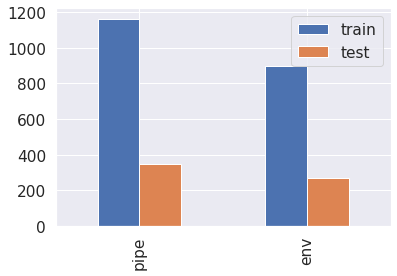

In [16]:
import pandas as pd
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
             'test': test_counts},
            index=class_names).plot.bar()
plt.show()

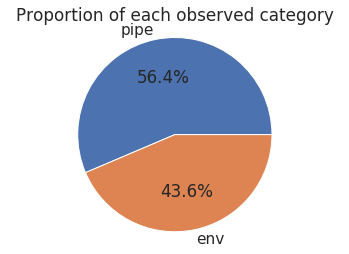

In [18]:
plt.pie(train_counts, explode=(0, 0),
       labels=class_names,
       autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

# Scale the data
A good practice is to scale the data

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Visualize the data
Random of images from the training set.

In [20]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond 
        label from the labels array
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

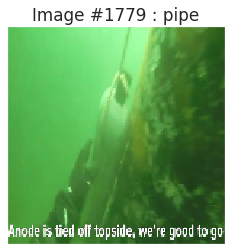

In [21]:
display_random_image(class_names,train_images, train_labels)

Now let's display the first 25 images from the training set directly with a loop to get a better view.

In [24]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its 
        corresponding labels
    """
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle('Some examples of images of the dataset', fontsize=16)
    for i in range(25):
        plt.subplot(5,5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

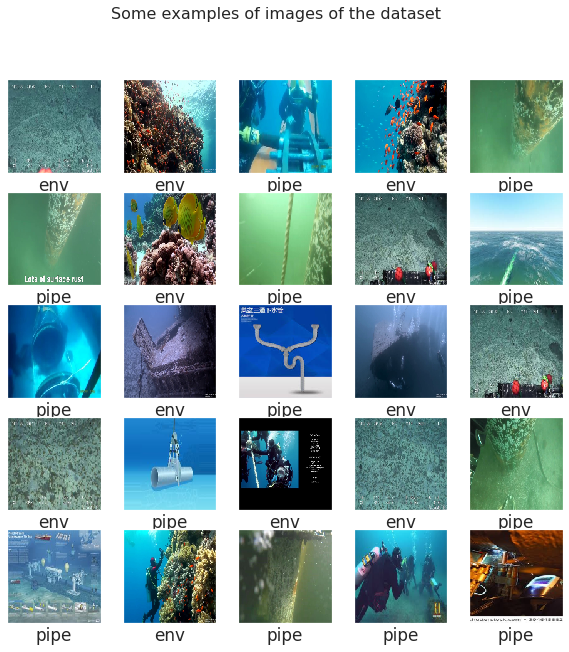

In [25]:
display_examples(class_names, train_images, train_labels)

# Create a simple classification model
In order to create a simple classification model the following steps will be followed:
1. Build the model
2. Compile the model
3. Train/fit the data to the model
4. Evaluate the model on the testing set
5. Carry out an error analysis of the model

An easy model is composed of different layers such as:
* **Conv2D**: (32 filters of size 3 by 3). The features will be *extracted* from the image.
* **MaxPooling2D**: The images get half sized
* **Flatten**: Transforms the format of the images from a 2d-array to a 1d-array of 150x150x3 pixel values.
* **Relu**: given a value of *x* returns *max(x,0)*.
* **Softmax**: 2 neurons, probability that the image belongs to one of the classes.

In [46]:
# Define the model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    ])

### The next step is to compile the model with some parameters such as: 
* **Optimizer**: *adam* = RMSProp + Momentum. (What is Momentum and RMSProp?)
* **Momentum** takes into account past gradient to have a better update.
* **RMSProp** exponentially weighted average of the squares of the past gradients.
* **Loss function**: in this model sparse categorical crossentropy will be used for the classification task, each image belongs to one class only.

In [47]:
# Define model compilation
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])    

In [48]:
# Fit the model

history = model.fit(train_images, train_labels, batch_size=64, epochs=20, validation_split = 0.2)

Train on 1649 samples, validate on 413 samples
Epoch 1/20
1649/1649 [==============================] - 71s 43ms/sample - loss: 0.7866 - accuracy: 0.7186 - val_loss: 0.2939 - val_accuracy: 0.8596
Epoch 2/20
1649/1649 [==============================] - 67s 41ms/sample - loss: 0.2105 - accuracy: 0.9181 - val_loss: 0.3227 - val_accuracy: 0.8426
Epoch 3/20
1649/1649 [==============================] - 60s 36ms/sample - loss: 0.1505 - accuracy: 0.9412 - val_loss: 0.1691 - val_accuracy: 0.9274
Epoch 4/20
1649/1649 [==============================] - 66s 40ms/sample - loss: 0.0855 - accuracy: 0.9727 - val_loss: 0.2030 - val_accuracy: 0.9177
Epoch 5/20
1649/1649 [==============================] - 67s 40ms/sample - loss: 0.0945 - accuracy: 0.9642 - val_loss: 0.1207 - val_accuracy: 0.9467
Epoch 6/20
1649/1649 [==============================] - 67s 41ms/sample - loss: 0.0569 - accuracy: 0.9812 - val_loss: 0.0884 - val_accuracy: 0.9613
Epoch 7/20
1649/1649 [==============================] - 86s 52ms/

In [69]:
# Plot accuracy 
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Plot accuracy
    plt.subplot(221)
    plt.plot(acc,'bo--', label = "acc")
    plt.plot(val_acc, 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

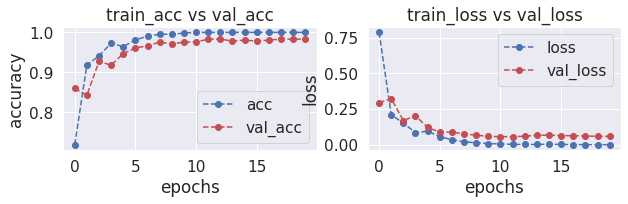

In [70]:
plot_accuracy_loss(history)

In [72]:
# Model evaluation on test set
test_loss = model.evaluate(test_images, test_labels)

616/616 [==============================] - 4s 6ms/sample - loss: 0.0377 - accuracy: 0.9886


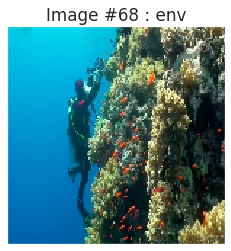

In [73]:
# Let's check how the classifier is doing on random images
predictions = model.predict(test_images) # Vector of probabilities
pred_labels = np.argmax(predictions, axis=1) # Take the highest probability

display_random_image(class_names, test_images, pred_labels)

# Error analysis
Try to understand on which kind of images the classifier has trouble.

In [76]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

IndexError: index 7 is out of bounds for axis 0 with size 7

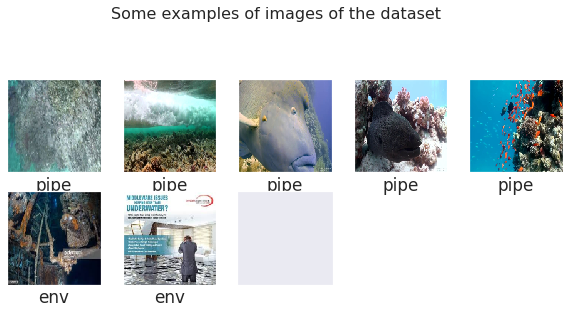

In [78]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

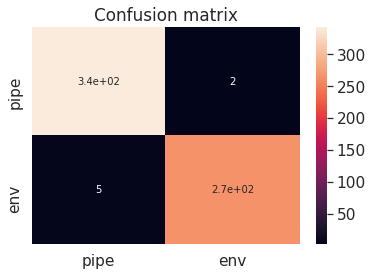

In [79]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
          annot_kws={'size': 10},
          xticklabels=class_names,
          yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

# Feature extraction with VGG ImageNet
Extract features from VGG16
Fine Tuning with VGG16 trained on ImageNet, which will hopefully give a better accuracy to the network.

In [81]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 51s 1us/step


In [82]:
# Get the features directly from VGG16

train_features = model.predict(train_images)
test_features = model.predict(test_images)

# Visualize the features through PCA
The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent.

In [83]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [84]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)

X = train_features.reshape((n_train, x * y * z))
pca.fit(X)

C = pca.transform(X)

C1 = C[:,0]
C2 = C[:,1]


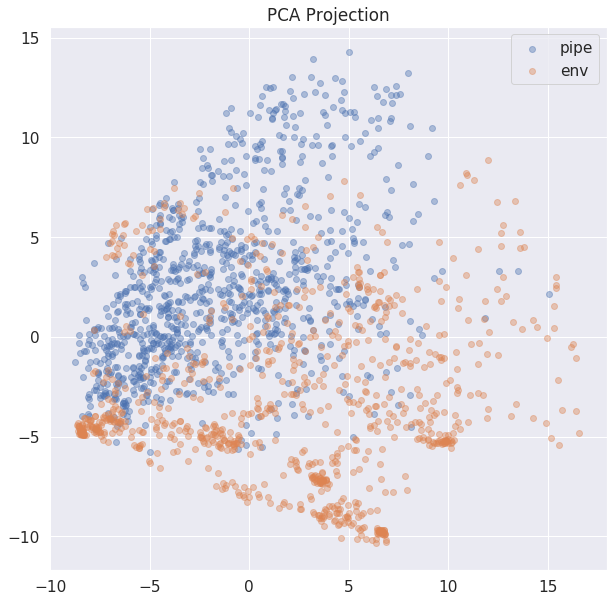

In [86]:
# Figures
plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

# Training on top of VGG

In [87]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Train on 1649 samples, validate on 413 samples
Epoch 1/15
1649/1649 [==============================] - 1s 510us/sample - loss: 0.4375 - accuracy: 0.8108 - val_loss: 0.1842 - val_accuracy: 0.9467
Epoch 2/15
1649/1649 [==============================] - 0s 212us/sample - loss: 0.1318 - accuracy: 0.9503 - val_loss: 0.1269 - val_accuracy: 0.9709
Epoch 3/15
1649/1649 [==============================] - 0s 207us/sample - loss: 0.0734 - accuracy: 0.9800 - val_loss: 0.1184 - val_accuracy: 0.9709
Epoch 4/15
1649/1649 [==============================] - 0s 178us/sample - loss: 0.0482 - accuracy: 0.9897 - val_loss: 0.1053 - val_accuracy: 0.9734
Epoch 5/15
1649/1649 [==============================] - 0s 221us/sample - loss: 0.0370 - accuracy: 0.9945 - val_loss: 0.1039 - val_accuracy: 0.9806
Epoch 6/15
1649/1649 [==============================] - 0s 235us/sample - loss: 0.0305 - accuracy: 0.9964 - val_loss: 0.1038 - val_accuracy: 0.9806
Epoch 7/15
1649/1649 [==============================] - 0s 217us/

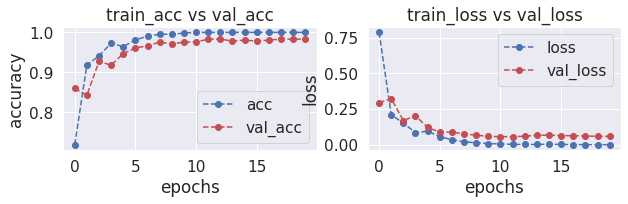

In [88]:
plot_accuracy_loss(history)

In [89]:
test_loss = model2.evaluate(test_features, test_labels)

616/616 [==============================] - 0s 304us/sample - loss: 0.0340 - accuracy: 0.9854


# Ensemble Neural Networks

In [90]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proportion of samples to use to train each training 
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

Define ***n_estimators*** Neural Networks.
Each Nueral Net will be trained on random subasets of the training dataset. Each subset contains ***max_samples*** samples. 

In [92]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                 # One layer with random size
                                 tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                 tf.keras.layers.Dense(2, activation=tf.nn.softmax)
                                ])
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store the model
    models. append(model)

In [93]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx],
                                  train_labels[train_idx],
                                  batch_size=64,
                                  epochs=10,
                                  validation_split=0.1))

Train on 1484 samples, validate on 165 samples
Epoch 1/10
1484/1484 [==============================] - 1s 887us/sample - loss: 0.4820 - accuracy: 0.8039 - val_loss: 0.1936 - val_accuracy: 0.9212
Epoch 2/10
1484/1484 [==============================] - 1s 374us/sample - loss: 0.1381 - accuracy: 0.9495 - val_loss: 0.1371 - val_accuracy: 0.9697
Epoch 3/10
1484/1484 [==============================] - 1s 440us/sample - loss: 0.0733 - accuracy: 0.9798 - val_loss: 0.0886 - val_accuracy: 0.9758
Epoch 4/10
1484/1484 [==============================] - 1s 444us/sample - loss: 0.0487 - accuracy: 0.9926 - val_loss: 0.0642 - val_accuracy: 0.9758
Epoch 5/10
1484/1484 [==============================] - 1s 413us/sample - loss: 0.0323 - accuracy: 0.9946 - val_loss: 0.0570 - val_accuracy: 0.9697
Epoch 6/10
1484/1484 [==============================] - 1s 369us/sample - loss: 0.0250 - accuracy: 0.9980 - val_loss: 0.0493 - val_accuracy: 0.9697
Epoch 7/10
1484/1484 [==============================] - 1s 391us/

### Aggregate each model individual predictions to form a final prediction

In [95]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis = 1)

In [96]:
from sklearn.metrics import accuracy_score
print('Accuracy : {}'.format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.9837662337662337


# Fine Tuning the VGG ImageNet

In [97]:
from keras.models import Model

model = VGG16(weights = 'imagenet', include_top = False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [98]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [99]:
from keras.layers import Input, Dense, Conv2D, Activation, MaxPooling2D, Flatten

model2 = VGG16(weights = 'imagenet', include_top = False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)

x = Conv2D(64, (3, 3), activation = 'relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100, activation = 'relu')(x)
x = Dense(2, activation = 'softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [100]:
# compile the model 
new_model.compile(optimizer = 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

In [101]:
new_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 9, 9, 512)         0         
_________________________________________________________________
block5_conv1 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          294976    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0   

In [102]:
history = new_model.fit(train_features,
                        train_labels,
                        batch_size = 64,
                        epochs = 10,
                       validation_split = 0.2)

Train on 1649 samples, validate on 413 samples
Epoch 1/10
1649/1649 [==============================] - 54s 32ms/step - loss: 0.5948 - accuracy: 0.6877 - val_loss: 0.4050 - val_accuracy: 0.8886
Epoch 2/10
1649/1649 [==============================] - 52s 31ms/step - loss: 0.1512 - accuracy: 0.9466 - val_loss: 0.0952 - val_accuracy: 0.9661
Epoch 3/10
1649/1649 [==============================] - 62s 38ms/step - loss: 0.0591 - accuracy: 0.9763 - val_loss: 0.0572 - val_accuracy: 0.9806
Epoch 4/10
1649/1649 [==============================] - 63s 38ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0656 - val_accuracy: 0.9831
Epoch 5/10
1649/1649 [==============================] - 62s 38ms/step - loss: 0.0434 - accuracy: 0.9879 - val_loss: 0.2936 - val_accuracy: 0.9419
Epoch 6/10
1649/1649 [==============================] - 65s 39ms/step - loss: 0.1260 - accuracy: 0.9491 - val_loss: 0.1466 - val_accuracy: 0.9661
Epoch 7/10
1649/1649 [==============================] - 59s 36ms/step - loss:

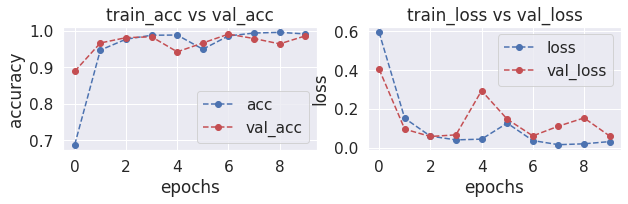

In [103]:
plot_accuracy_loss(history)

In [104]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)
pred_labels = np.argmax(predictions, axis = 1)
print('Accuracy : {}'.format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.9853896103896104
